In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df_regression = pd.read_csv("./Hours and Scores.csv")
df_regression = pd.DataFrame({'x':np.arange(100),'y':np.arange(100)**3})

In [56]:
df_regression.head()

,x,y
0,0,0
1,1,1
2,2,8
3,3,27
4,4,64


In [57]:
df_regression.shape

(100, 2)

In [58]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       100 non-null    int64
 1   y       100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [59]:
df_regression.columns

Index(['x', 'y'], dtype='object')

In [60]:
df_regression.describe()

,x,y
count,100.000000,100.000000
mean,49.500000,245025.000000
std,29.011492,280457.581671
min,0.000000,0.000000
25%,24.750000,15174.750000
50%,49.500000,121324.500000
75%,74.250000,409386.750000
max,99.000000,970299.000000


In [61]:
df_regression.isna().sum()

x    0
y    0
dtype: int64

In [62]:
df_regression.corr()

,x,y
x,1.000000,0.915516
y,0.915516,1.000000


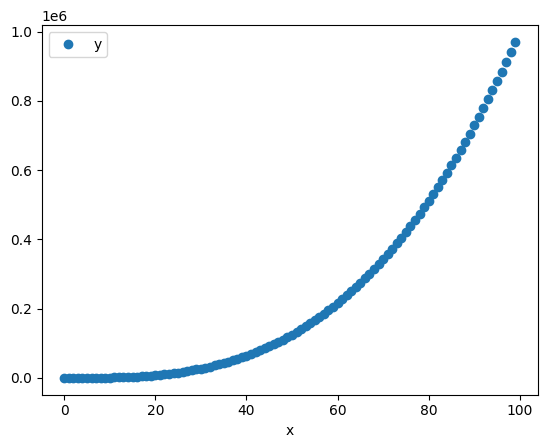

In [63]:
df_regression.plot(x='x',y='y',style='o')
plt.show()

In [36]:
df_regression

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [35]:
df_regression.iloc[:,1].values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [64]:
# x_regression = df_regression.iloc[:,:-1].values
# y_regression = df_regression.iloc[:,-2].values

x_regression = df_regression[['x']]
y_regression = df_regression[['y']]

# Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_regression,y_regression, 
                                                    test_size=0.2, random_state=33)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


In [65]:
line = regressor.coef_*x_regression+regressor.intercept_

In [66]:
x_regression.shape

(100, 1)

In [67]:
y_regression.shape

(100, 1)

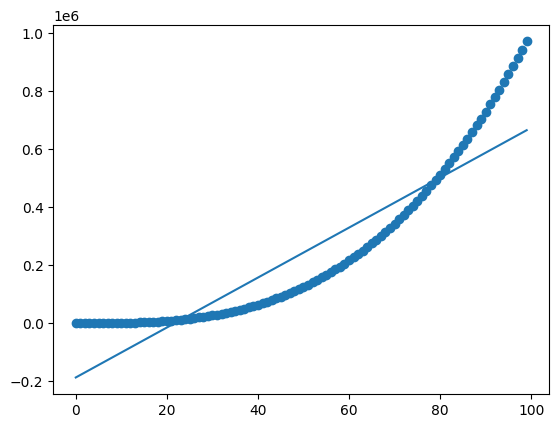

In [68]:
plt.scatter(x_regression, y_regression)
plt.plot(x_regression,line)
plt.show()

In [42]:
print(x_test)
y_pred = regressor.predict(x_test)

    Hours
24    7.8
15    8.9
17    1.9
5     1.5
4     3.5


In [43]:
y_test_squeeze = np.squeeze(y_test)
y_pred_squeeze = np.squeeze(y_pred)
df = pd.DataFrame({'Actual':y_test_squeeze, 'Predicted':y_pred_squeeze})
df

,Actual,Predicted
24,86,77.325418
15,95,87.748240
17,24,21.421195
5,20,17.631078
4,30,36.581662


In [44]:
regressor.score(x_train, y_train)

0.9442302809253366

In [45]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  5.491146412171137


In [46]:
print('r2 Score :', metrics.r2_score(y_test, y_pred))

r2 Score : 0.965340758834823


In [47]:
x_axis = range(len(y_test))
x_axis

range(0, 5)

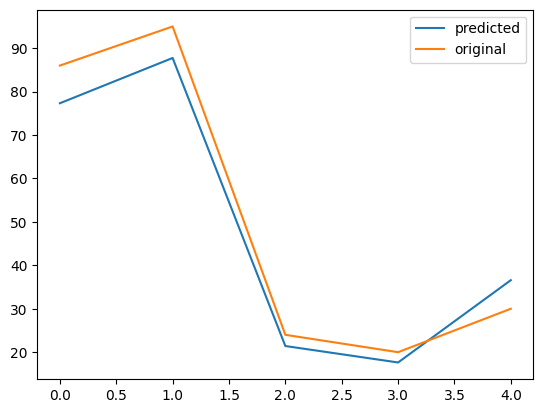

In [48]:

plt.plot(x_axis, y_pred, label='predicted')
plt.plot(x_axis,y_test, label='original')
plt.legend()
plt.show()

### Logistic Regression

In [49]:
df=pd.read_csv('./Hours and Scores.csv')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [50]:
x=df[['Hours']].values
y = df[['Scores']].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=0)
lm.fit(x_train,y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [54]:
y_pred=lm.predict(x_test)
print(x_test)
print(y_pred)

[[-1.11552508]
 [-0.2699997 ]
 [ 1.81894535]
 [-0.61815721]
 [ 1.07289355]
 [ 0.02842102]
 [-0.91657793]]
[30 30 88 30 88 30 30]
